In [1]:
'''Explain the concept of batch normalization in the context of Artificial Neural Networks

Batch normalizatino is the process of normalizing the batches which is sent to hidden layer
this is done to reduce the covariance shift , and mkaes the mean = 0 and variance = 1,
this increases the training speed
'''


'Explain the concept of batch normalization in the context of Artificial Neural Networks\n\nBatch normalizatino is the process of normalizing the batches which is sent to hidden layer\nthis is done to reduce the covariance shift , and mkaes the mean = 0 and variance = 1,\nthis increases the training speed\n'

In [2]:
'''
2. Describe the benefits of using batch normalization during training? 
Faster Training: By normalizing the inputs to each layer, batch normalization allows higher learning rates, which leads to faster convergence.
Improved Stability: Reducing internal covariate shifts helps stabilize the learning process, preventing issues like exploding or vanishing gradients.
Regularization Effect: Since normalization depends on the batch, there is a slight regularization effect (similar to dropout), which can reduce the need for other regularization techniques.
Reduced Sensitivity to Initialization: With batch normalization, networks become less sensitive to weight initialization, making it easier to start training deep networks.
'''

'\n2. Describe the benefits of using batch normalization during training? \nFaster Training: By normalizing the inputs to each layer, batch normalization allows higher learning rates, which leads to faster convergence.\nImproved Stability: Reducing internal covariate shifts helps stabilize the learning process, preventing issues like exploding or vanishing gradients.\nRegularization Effect: Since normalization depends on the batch, there is a slight regularization effect (similar to dropout), which can reduce the need for other regularization techniques.\nReduced Sensitivity to Initialization: With batch normalization, networks become less sensitive to weight initialization, making it easier to start training deep networks.\n'

In [3]:
'''
Discuss the working principle of batch normalization, including the normalization step and the learnable
parameters.

1) Calculate Mean and Standard Deviation
2) Normalize the inputs
Scale parameter (
𝛾
γ): This allows the model to adjust the variance of the normalized inputs.
Shift parameter (
𝛽
β): This allows the model to adjust the mean of the normalized inputs.

'''

'\nDiscuss the working principle of batch normalization, including the normalization step and the learnable\nparameters.\n\n1) Calculate Mean and Standard Deviation\n2) Normalize the inputs\nScale parameter (\n𝛾\nγ): This allows the model to adjust the variance of the normalized inputs.\nShift parameter (\n𝛽\nβ): This allows the model to adjust the mean of the normalized inputs.\n\n'

In [24]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [41]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [ ]:
x_train

In [26]:
import matplotlib.pyplot as plt

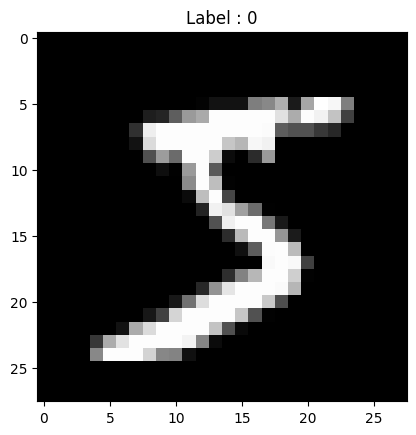

In [27]:
plt.imshow(x_train[0],cmap='gray')
plt.title(f"Label : {y_train[1]}" )
plt.show()

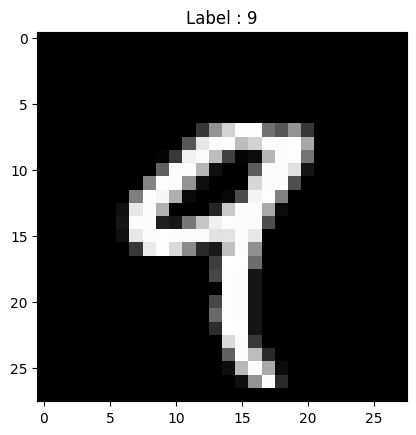

In [42]:
plt.imshow(x_train[4],cmap='gray')
plt.title(f"Label : {y_train[4]}" )
plt.show()

In [64]:
# Normalize the pixel values to the range [0, 1]
x_train_normalized = x_train / 255.
x_test_normalized = x_test / 255.

In [65]:
# Convert the labels to one-hot encoded vectors
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

print("One-hot encoded label for first training example:", y_train_one_hot[0])


One-hot encoded label for first training example: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [79]:
Layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="input_layer"),  # No space in the name
    tf.keras.layers.Dense(300, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(100, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
]


In [80]:
model_clf = tf.keras.models.Sequential(Layers)

In [81]:
model_clf.layers

[<Flatten name=input_layer, built=True>,
 <Dense name=hidden_layer_1, built=True>,
 <Dense name=hidden_layer_2, built=True>,
 <Dense name=output_layer, built=True>]

In [82]:
model_clf.compile(
    optimizer='adam',  # You can also use 'sgd', 'rmsprop', etc.
    loss='categorical_crossentropy',  # For classification tasks (if using one-hot encoded labels)
    metrics=['accuracy']  # To monitor accuracy during training
)

In [83]:
history = model_clf.fit(
    x_train_normalized,  # Your normalized training data (e.g., MNIST)
    y_train_one_hot,  # One-hot encoded labels
    batch_size=32,  # Batch size
    epochs=10,  # Number of epochs
 
)

Epoch 1/10


ValueError: 'sequential_input layer_sequential_4_input layer_sequential_5_input layer_sequential_7_hidden_layer_1_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [70]:
print(x_train_normalized.shape)  # Should be (num_samples, 28, 28)
print(y_train_one_hot.shape)     # Should be (num_samples, 10) if one-hot encoded

(60000, 28, 28)
(60000, 10)


In [87]:
Layers = [
    tf.keras.layers.Flatten(input_shape=[28, 28], name="input"),  # Valid name, no spaces
    tf.keras.layers.Dense(300, activation='relu', name="hidden1"),  # No invalid characters
    tf.keras.layers.Dense(100, activation='relu', name="hidden2"),  # No invalid characters
    tf.keras.layers.Dense(10, activation='softmax', name="output")  # No invalid characters
]

# Create the model
model_clf = tf.keras.models.Sequential(Layers)

# Compile the model
model_clf.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Loss for multi-class classification
    metrics=['accuracy']  # Metric to monitor
)

history = model_clf.fit(
    x_train_normalized,  # Your normalized training data (e.g., MNIST)
    y_train_one_hot,  # One-hot encoded labels
    batch_size=32,  # Batch size
    epochs=10,  # Number of epochs
 
)

c:\Users\Dhana\miniconda3\envs\git_pw\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


ValueError: 'sequential_input layer_sequential_4_input layer_sequential_5_input layer_sequential_11_hidden1_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


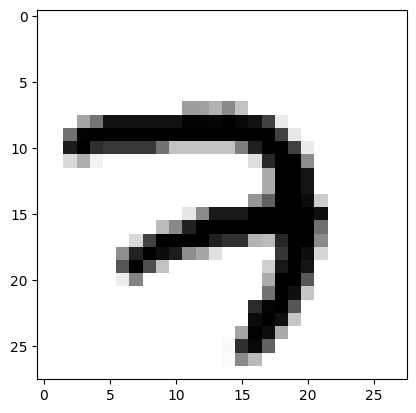

c:\Users\Dhana\miniconda3\envs\git_pw\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

<Figure size 1500x1500 with 0 Axes>

In [102]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt


import os

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")
X_test.shape
len(X_test[1][0])

# create a validation data set from the full training data

# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# scale the test set as well

X_test = X_test / 255.

len(X_train_full[5000:] )

# Lets view some data

plt.imshow(X_train[0], cmap="binary")
plt.show()
plt.figure(figsize=(15,15))
# sns.heatmap(X_train[0], annot=True, cmap="binary")

# Architecture Used:



# Creating layers of ANN

LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)
model_clf.layers
model_clf.summary()

In [103]:
# Compile the model
model_clf.compile(
    optimizer='adam',  # Adam optimizer
    loss='categorical_crossentropy',  # Loss for multi-class classification
    metrics=['accuracy']  # Metric to monitor
)

history = model_clf.fit(
    X_train,  # Your normalized training data (e.g., MNIST)
    y_train_one_hot,  # One-hot encoded labels
    batch_size=32,  # Batch size
    epochs=10,  # Number of epochs
    validation_data=(X_t)
 
)

Epoch 1/10


ValueError: 'sequential_input layer_sequential_4_input layer_sequential_5_input layer_sequential_14_hiddenLayer1_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [100]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=10)

In [104]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Step 2: Define a Simple Feedforward Neural Network
model_clf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input_layer"),
    tf.keras.layers.Dense(128, activation='relu', name='hidden_layer_1'),
    tf.keras.layers.Dense(64, activation='relu', name='hidden_layer_2'),
    tf.keras.layers.Dense(10, activation='softmax', name="output_layer")
])

# Step 3: Compile the Model
model_clf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Using categorical crossentropy for one-hot labels
    metrics=['accuracy']
)

# Train the model
history = model_clf.fit(
    x_train_normalized,  # Training data
    y_train_one_hot,  # One-hot encoded labels
    validation_data=(x_test_normalized, y_test_one_hot),  # Validation data
    batch_size=32,  # Batch size
    epochs=10  # Number of epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_clf.evaluate(x_test_normalized, y_test_one_hot)
print(f"Test accuracy: {test_accuracy:.4f}")


c:\Users\Dhana\miniconda3\envs\git_pw\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


ValueError: 'sequential_input layer_sequential_4_input layer_sequential_5_input layer_sequential_15_hidden_layer_1_kernel_momentum' is not a valid scope name. A scope name has to match the following pattern: ^[A-Za-z0-9_.\\/>-]*$

In [105]:
tf.keras.backend.clear_session()


In [107]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Define a Simple Feedforward Neural Network with valid names
model_clf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="input_yer"),  # No spaces
    tf.keras.layers.Dense(128, activation='relu', name='hidden_yer_1'),  # Use underscores
    tf.keras.layers.Dense(64, activation='relu', name='hiddenayer_2'),  # Use underscores
    tf.keras.layers.Dense(10, activation='softmax', name="outpu_layer")  # No spaces
])

# Compile the model
model_clf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model_clf.fit(
    x_train_normalized,  # Training data
    y_train_one_hot,  # One-hot encoded labels
    validation_data=(x_test_normalized, y_test_one_hot),  # Validation data
    batch_size=32,  # Batch size
    epochs=10  # Number of epochs
)

# Evaluate the model on the test set
test_loss, test_accuracy = model_clf.evaluate(x_test_normalized, y_test_one_hot)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8747 - loss: 0.4257 - val_accuracy: 0.9625 - val_loss: 0.1226
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9680 - loss: 0.1068 - val_accuracy: 0.9723 - val_loss: 0.0900
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0705 - val_accuracy: 0.9764 - val_loss: 0.0786
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9859 - loss: 0.0485 - val_accuracy: 0.9748 - val_loss: 0.0821
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9868 - loss: 0.0419 - val_accuracy: 0.9727 - val_loss: 0.0917
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9892 - loss: 0.0326 - val_accuracy: 0.9754 - val_loss: 0.0823
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9910 - loss: 0.0251 - val_accuracy: 0.9801 - val_loss: 0.0758
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9924 - loss: 0.0235 - 

In [108]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

# Clear the current Keras session
tf.keras.backend.clear_session()

# Step 2: Define a Simple Feedforward Neural Network with Batch Normalization
model_clf = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="inp_layer"),
    tf.keras.layers.Dense(128, activation='relu', name='hien_layer_1'),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dense(64, activation='relu', name='hden_layer_2'),
    tf.keras.layers.BatchNormalization(),  # Batch Normalization
    tf.keras.layers.Dense(10, activation='softmax', name="out_layer")
])

# Step 3: Compile the Model
model_clf.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the Model
history = model_clf.fit(
    x_train_normalized,  # Training data
    y_train_one_hot,  # One-hot encoded labels
    validation_data=(x_test_normalized, y_test_one_hot),  # Validation data
    batch_size=32,  # Batch size
    epochs=10  # Number of epochs
)

# Step 5: Evaluate the Model
test_loss, test_accuracy = model_clf.evaluate(x_test_normalized, y_test_one_hot)
print(f"Test accuracy: {test_accuracy:.4f}")


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8768 - loss: 0.4133 - val_accuracy: 0.9543 - val_loss: 0.1429
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9625 - loss: 0.1221 - val_accuracy: 0.9624 - val_loss: 0.1192
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9686 - loss: 0.0967 - val_accuracy: 0.9736 - val_loss: 0.0896
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0768 - val_accuracy: 0.9705 - val_loss: 0.1056
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9791 - loss: 0.0640 - val_accuracy: 0.9742 - val_loss: 0.0823
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9818 - loss: 0.0573 - val_accuracy: 0.9766 - val_loss: 0.0758
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9844 - loss: 0.0501 - val_accuracy: 0.9742 - val_loss: 0.0838
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0452 - 